In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Load the FTIR spectra data from the uploaded CSV file
info_A1 = r"C:\Users\pingk\Downloads\fadhli nitip\asik6a.csv"
ftir_data = pd.read_csv(info_A1)

In [29]:
# Display the first few rows of the dataset to understand its structure
print(ftir_data.head())

  prov_char country_char               wavenumber   649.893   650.376  \
0       BBX           ID  ID-BBX-068-2306-011_001  0.013426  0.014513   
1       BBX           ID  ID-BBX-068-2306-011_002  0.015879  0.016232   
2       BBX           ID  ID-BBX-068-2306-011_003  0.014529  0.014121   
3       BBX           ID  ID-BBX-068-2306-011_004  0.011612  0.010349   
4       BBX           ID  ID-BBX-068-2306-011_005  0.018775  0.018823   

    650.858    651.34   651.822   652.304   652.786  ...  3998.194  3998.676  \
0  0.015536  0.016657  0.018048  0.019807  0.021896  ... -0.000479 -0.000466   
1  0.016136  0.015821  0.015579  0.015664  0.016184  ...  0.000028  0.000005   
2  0.013155  0.011991  0.011024  0.010581  0.010817  ... -0.000955 -0.000920   
3  0.008967  0.007803  0.007213  0.007471  0.008675  ...  0.000526  0.000693   
4  0.018383  0.017739  0.017201  0.016998  0.017179  ...  0.000262  0.000426   

   3999.158   3999.64  4000.122  tgp_name  dgp_name  fgp_name  country_name  \
0

The dataset contains FTIR spectra data with columns representing different wavenumbers and their corresponding absorption values. The relevant features for the requested visualization include country_name for coloring the spectra. The wavenumber columns range from 649.893 to 4000.122 cm⁻¹.

Let's create a visualization where the x-axis is reversed (4000 to 650 cm⁻¹), and the spectra are colored based on the country_name feature. We will also include a legend indicating the color associated with each country.

To achieve this, we'll plot the spectra using Matplotlib and adjust the x-axis accordingly.

In [30]:
unique_countries = ftir_data['country_name'].unique()
print(unique_countries)


['Indonesia' 'Malaysia' 'Thailand']


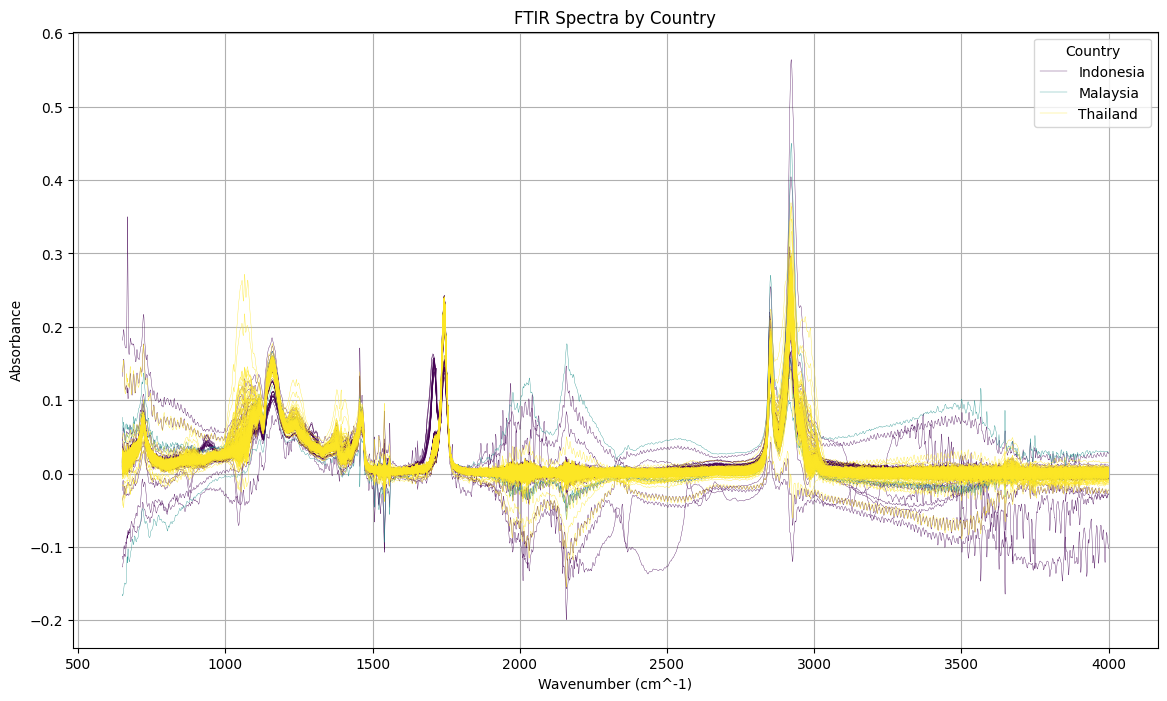

In [31]:
#assert len(unique_countries) == 3, "There should be exactly three unique countries"

# Create a viridis color palette
viridis = plt.get_cmap('viridis', len(unique_countries))
country_colors = {country: viridis(i) for i, country in enumerate(unique_countries)}

# Extract wavenumbers and reverse them
wavenumbers = ftir_data.columns[3:-5].astype(float)[::-1]

# Plotting
plt.figure(figsize=(14, 8))

for country in unique_countries:
    subset = ftir_data[ftir_data['country_name'] == country]
    first_plot = True
    for i, row in subset.iterrows():
        if first_plot:
            plt.plot(wavenumbers, row.iloc[3:-5].values[::-1], label=country, color=country_colors[country], linewidth=0.25)
            first_plot = False
        else:
            plt.plot(wavenumbers, row.iloc[3:-5].values[::-1], color=country_colors[country], linewidth=0.25)

# Customizing the plot
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Absorbance')
plt.title('FTIR Spectra by Country')
plt.legend(title='Country')
plt.grid(True)  # Enable the grid

# Showing the plot
plt.show()

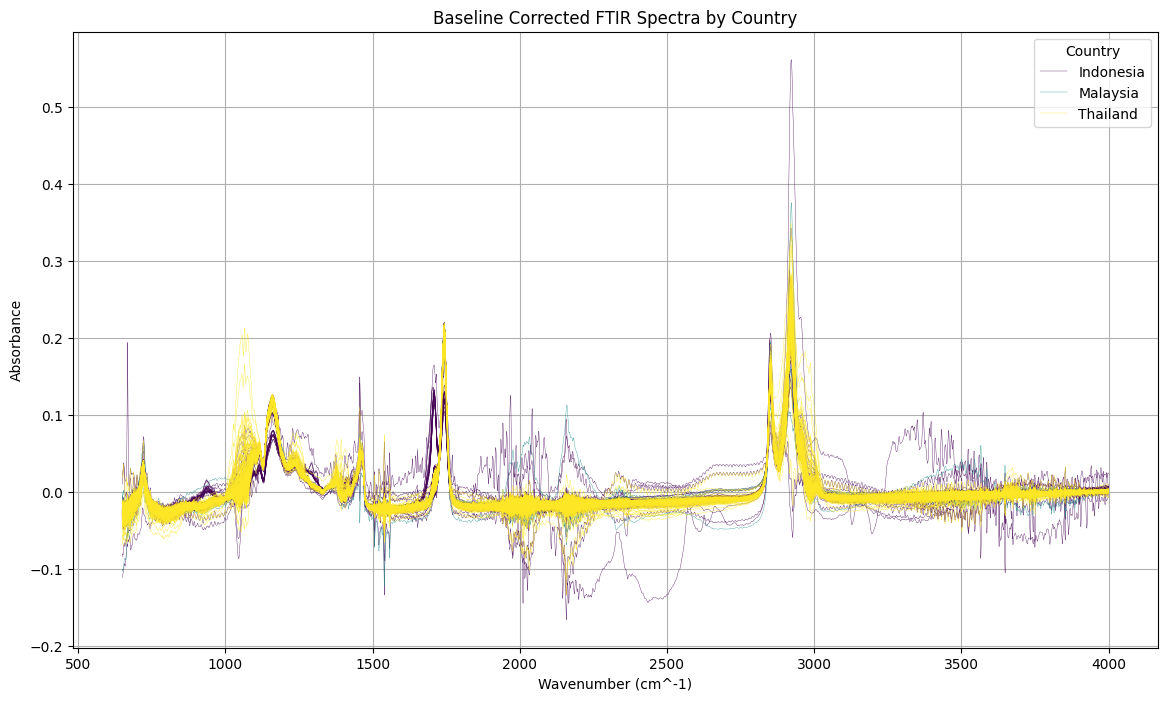

In [32]:

# Check unique countries
unique_countries = ftir_data['country_name'].unique()

# Create a viridis color palette
viridis = plt.get_cmap('viridis', len(unique_countries))
country_colors = {country: viridis(i) for i, country in enumerate(unique_countries)}

# Extract wavenumbers and reverse them
wavenumbers = ftir_data.columns[3:-5].astype(float)[::-1]

# Function to perform baseline correction
def baseline_correction(spectrum, poly_order=3):
    spectrum = spectrum.astype(float)  # Ensure the spectrum is float
    x = np.arange(len(spectrum))
    p = np.polyfit(x, spectrum, poly_order)
    baseline = np.polyval(p, x)
    return spectrum - baseline

# Plotting
plt.figure(figsize=(14, 8))

for country in unique_countries:
    subset = ftir_data[ftir_data['country_name'] == country]
    first_plot = True
    for i, row in subset.iterrows():
        spectrum = row.iloc[3:-5].values[::-1]
        corrected_spectrum = baseline_correction(spectrum)
        if first_plot:
            plt.plot(wavenumbers, corrected_spectrum, label=country, color=country_colors[country], linewidth=0.25)
            first_plot = False
        else:
            plt.plot(wavenumbers, corrected_spectrum, color=country_colors[country], linewidth=0.25)

# Customizing the plot
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Absorbance')
plt.title('Baseline Corrected FTIR Spectra by Country')
plt.legend(title='Country')
plt.grid(True)  # Enable the grid

# Showing the plot
plt.show()

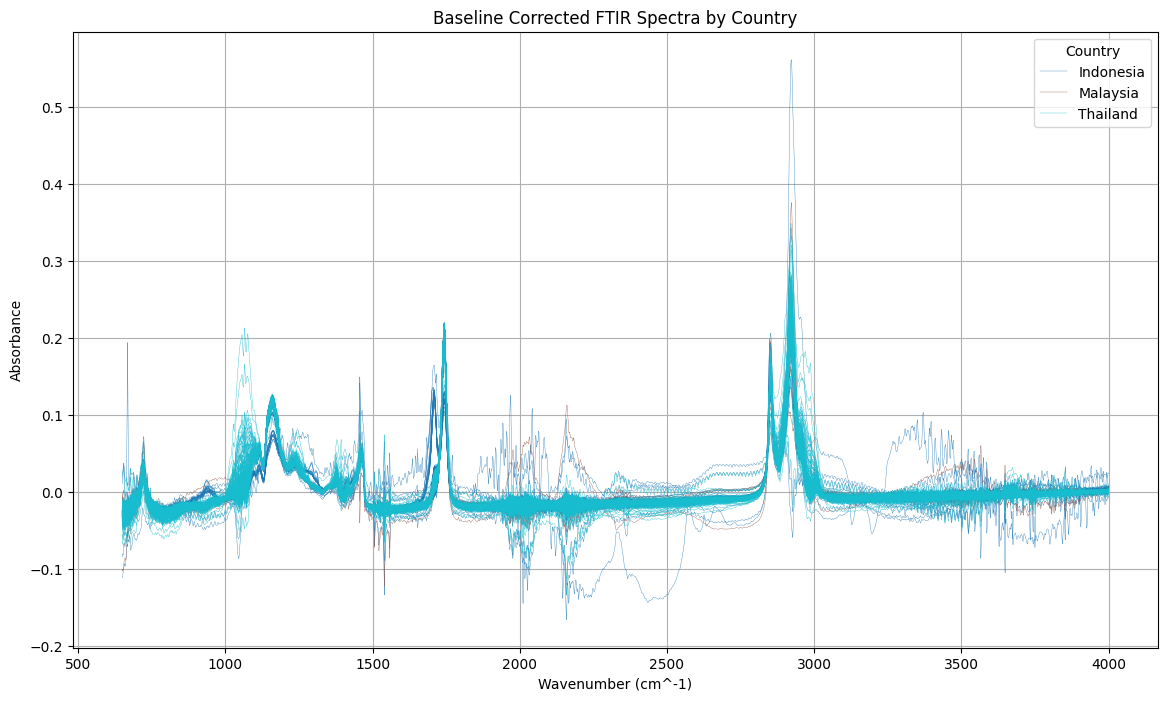

In [33]:
# Check unique countries
unique_countries = ftir_data['country_name'].unique()

# Create a tab10 color palette
tab10 = plt.get_cmap('tab10', len(unique_countries))
country_colors = {country: tab10(i) for i, country in enumerate(unique_countries)}

# Extract wavenumbers and reverse them
wavenumbers = ftir_data.columns[3:-5].astype(float)[::-1]

# Function to perform baseline correction
def baseline_correction(spectrum, poly_order=3):
    spectrum = spectrum.astype(float)  # Ensure the spectrum is float
    x = np.arange(len(spectrum))
    p = np.polyfit(x, spectrum, poly_order)
    baseline = np.polyval(p, x)
    return spectrum - baseline

# Plotting
plt.figure(figsize=(14, 8))

for country in unique_countries:
    subset = ftir_data[ftir_data['country_name'] == country]
    first_plot = True
    for i, row in subset.iterrows():
        spectrum = row.iloc[3:-5].values[::-1]
        corrected_spectrum = baseline_correction(spectrum)
        if first_plot:
            plt.plot(wavenumbers, corrected_spectrum, label=country, color=country_colors[country], linewidth=0.25)
            first_plot = False
        else:
            plt.plot(wavenumbers, corrected_spectrum, color=country_colors[country], linewidth=0.25)

# Customizing the plot
plt.xlabel('Wavenumber (cm^-1)')
plt.ylabel('Absorbance')
plt.title('Baseline Corrected FTIR Spectra by Country')
plt.legend(title='Country')
plt.grid(True)  # Enable the grid

# Showing the plot
plt.show()

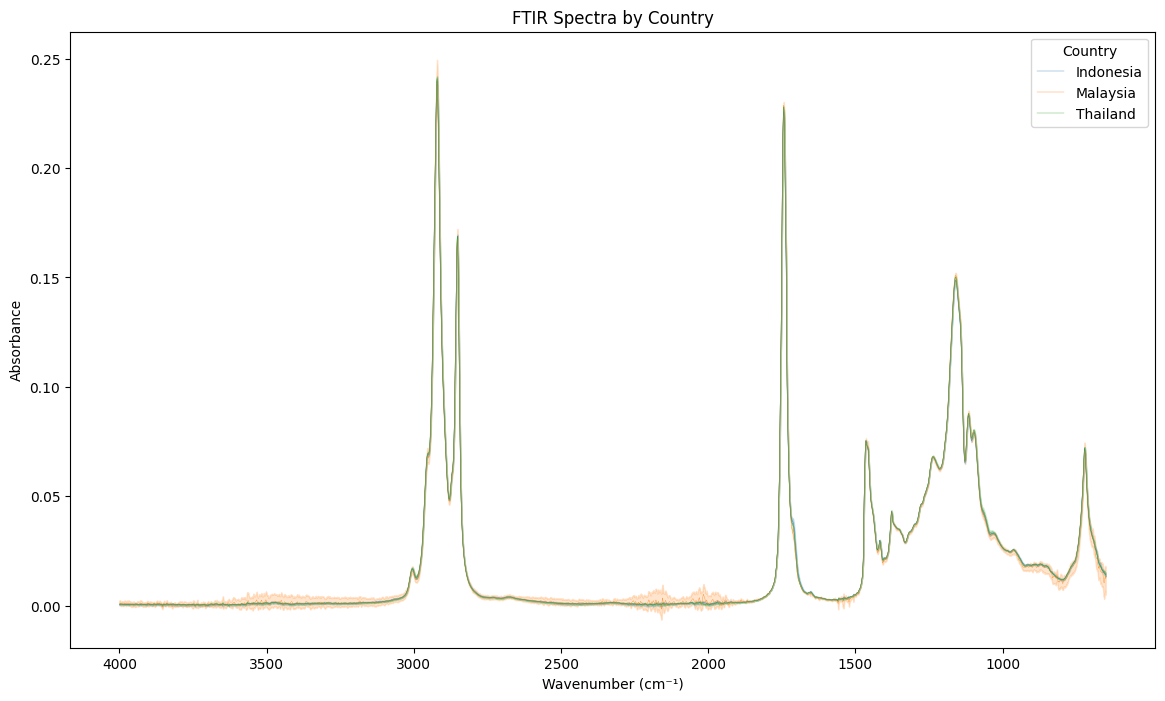

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Data Visualization (Spectroscopy Data by Country Code)
spectroscopy_columns = ftir_data.columns.difference(['country_code', 'prov_char', 'country_char', 'wavenumber', 'tgp_name', 'dgp_name', 'fgp_name', 'thnoth_name'])
melted_ftir_data = ftir_data.melt(id_vars='country_name', value_vars=spectroscopy_columns, var_name='Wavenumber', value_name='Intensity')

# Convert Wavenumber to numeric if it's not already
melted_ftir_data['Wavenumber'] = pd.to_numeric(melted_ftir_data['Wavenumber'])

plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_ftir_data, x='Wavenumber', y='Intensity', hue='country_name', palette='tab10', linewidth=0.25)
plt.title('FTIR Spectra by Country')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.legend(title='Country')

# Improve x-axis readability by setting ticks every 500 cm⁻¹ and reversing the axis
plt.xticks(np.arange(4000, 649, -500))  # Ticks from 4000 to 650 cm⁻¹
plt.gca().invert_xaxis()  # Reverse the x-axis
plt.grid(False)  # Enable grid

plt.show()

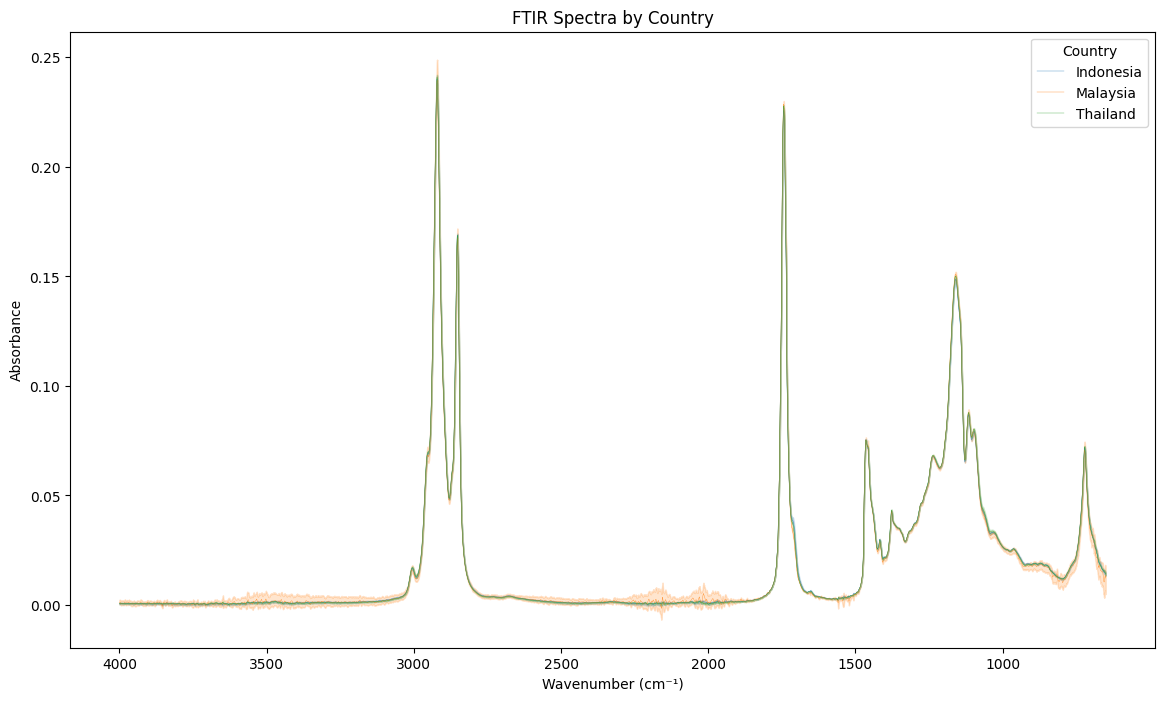

In [38]:
# Data Visualization (Spectroscopy Data by Country Code)
spectroscopy_columns = ftir_data.columns.difference(['country_code', 'prov_char', 'country_char', 'wavenumber', 'tgp_name', 'dgp_name', 'fgp_name', 'thnoth_name'])
melted_ftir_data = ftir_data.melt(id_vars='country_name', value_vars=spectroscopy_columns, var_name='Wavenumber', value_name='Intensity')

# Convert Wavenumber to numeric if it's not already
melted_ftir_data['Wavenumber'] = pd.to_numeric(melted_ftir_data['Wavenumber'])

plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_ftir_data, x='Wavenumber', y='Intensity', hue='country_name', linewidth=0.25, alpha=1)
plt.title('FTIR Spectra by Country')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.legend(title='Country')

# Improve x-axis readability by setting ticks every 500 cm⁻¹ and reversing the axis
plt.xticks(np.arange(4000, 649, -500))  # Ticks from 4000 to 650 cm⁻¹
plt.gca().invert_xaxis()  # Reverse the x-axis
plt.grid(False)  # Disable grid

plt.show()


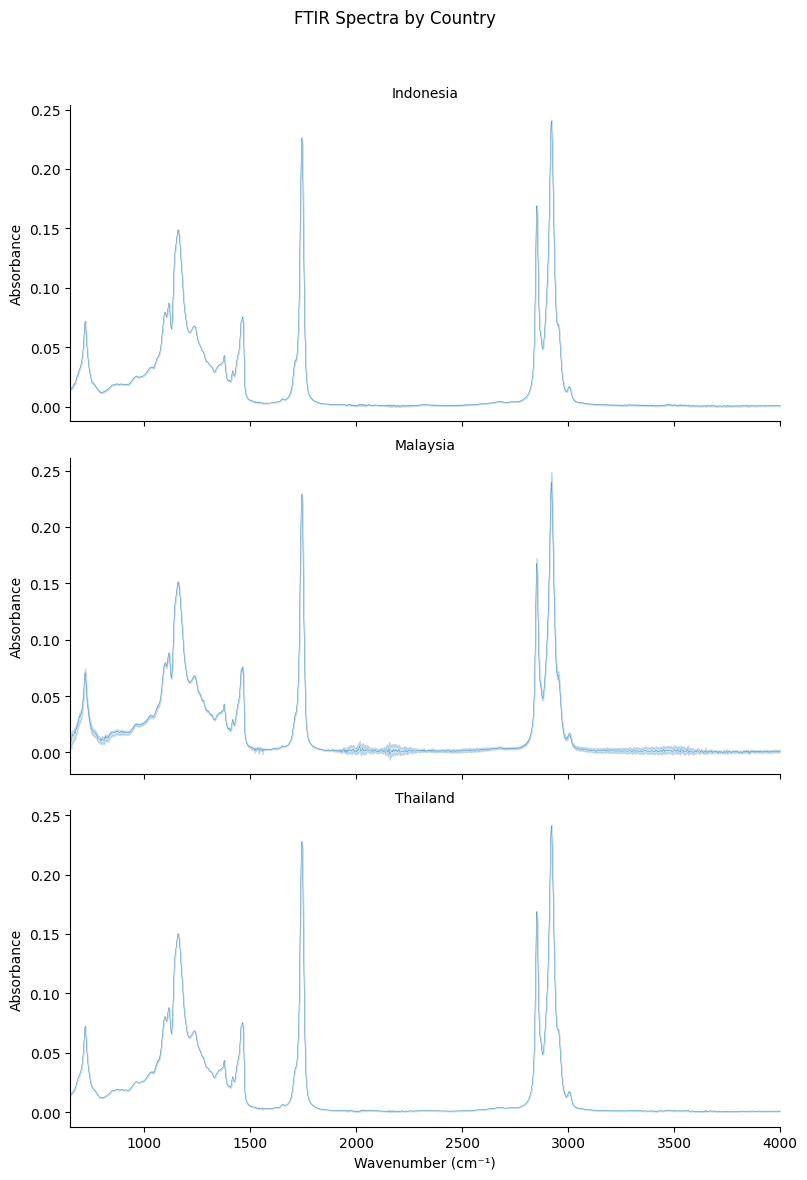

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Data Visualization (Spectroscopy Data by Country Code)
spectroscopy_columns = ftir_data.columns.difference(['country_code', 'prov_char', 'country_char', 'wavenumber', 'tgp_name', 'dgp_name', 'fgp_name', 'thnoth_name'])
melted_ftir_data = ftir_data.melt(id_vars='country_name', value_vars=spectroscopy_columns, var_name='Wavenumber', value_name='Intensity')

# Convert Wavenumber to numeric if it's not already
melted_ftir_data['Wavenumber'] = pd.to_numeric(melted_ftir_data['Wavenumber'])

# Create a FacetGrid for separate plots per country
g = sns.FacetGrid(melted_ftir_data, col='country_name', col_wrap=1, sharey=False, height=4, aspect=2)

# Map the lineplot onto each subplot
g.map(sns.lineplot, 'Wavenumber', 'Intensity', linewidth=0.25)

# Set the axis labels and titles
g.set_axis_labels('Wavenumber (cm⁻¹)', 'Absorbance')
g.set_titles(col_template='{col_name}')
g.set(xticks=np.arange(4000, 649, -500))
g.set(xlim=(4000, 650))

# Reverse the x-axis for each subplot
for ax in g.axes.flatten():
    ax.invert_xaxis()

# Add a title to the entire figure
plt.subplots_adjust(top=0.9)
g.fig.suptitle('FTIR Spectra by Country')

plt.show()


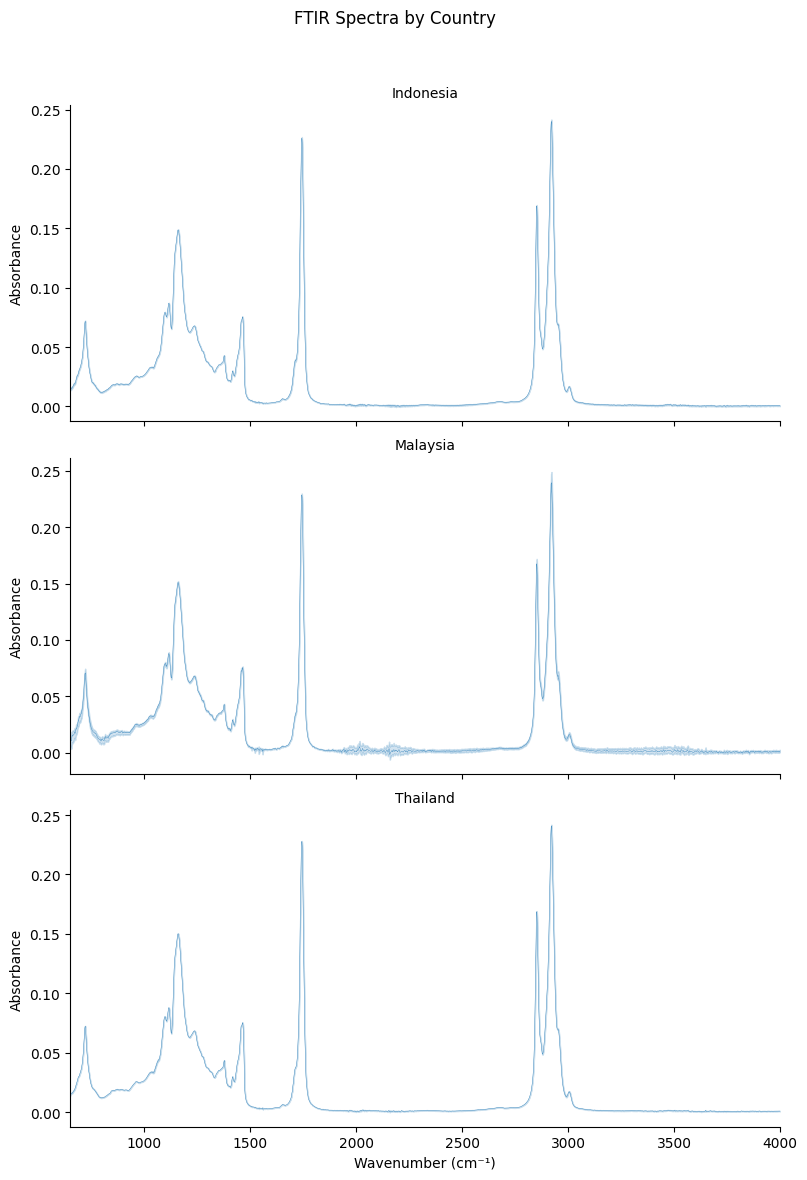

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Data Visualization (Spectroscopy Data by Country Code)
spectroscopy_columns = ftir_data.columns.difference(['country_code', 'prov_char', 'country_char', 'wavenumber', 'tgp_name', 'dgp_name', 'fgp_name', 'thnoth_name'])
melted_ftir_data = ftir_data.melt(id_vars='country_name', value_vars=spectroscopy_columns, var_name='Wavenumber', value_name='Intensity')

# Convert Wavenumber to numeric if it's not already
melted_ftir_data['Wavenumber'] = pd.to_numeric(melted_ftir_data['Wavenumber'])

# Define a specific color palette
palette = sns.color_palette('tab10', n_colors=melted_ftir_data['country_name'].nunique())

# Create a FacetGrid for separate plots per country
g = sns.FacetGrid(melted_ftir_data, col='country_name', col_wrap=1, sharey=False, height=4, aspect=2, palette=palette)

# Map the lineplot onto each subplot with alpha set to 1
g.map(sns.lineplot, 'Wavenumber', 'Intensity', linewidth=0.25, alpha=1)

# Set the axis labels and titles
g.set_axis_labels('Wavenumber (cm⁻¹)', 'Absorbance')
g.set_titles(col_template='{col_name}')
g.set(xticks=np.arange(4000, 649, -500))
g.set(xlim=(4000, 650))

# Reverse the x-axis for each subplot
for ax in g.axes.flatten():
    ax.invert_xaxis()

# Add a title to the entire figure
plt.subplots_adjust(top=0.9)
g.fig.suptitle('FTIR Spectra by Country')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Data Visualization (Spectroscopy Data by Country Code)
spectroscopy_columns = ftir_data.columns.difference(['country_code', 'prov_char', 'country_char', 'wavenumber', 'country_name', 'dgp_name', 'fgp_name', 'thnoth_name'])
melted_ftir_data = ftir_data.melt(id_vars='tgp_name', value_vars=spectroscopy_columns, var_name='Wavenumber', value_name='Intensity')

# Convert Wavenumber to numeric if it's not already
melted_ftir_data['Wavenumber'] = pd.to_numeric(melted_ftir_data['Wavenumber'])

plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_ftir_data, x='Wavenumber', y='Intensity', hue='tgp_name', palette='tab10')
plt.title('FTIR Spectra by Precipitation')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.legend(title='Precipitation Group')

# Improve x-axis readability by setting ticks every 500 cm⁻¹ and reversing the axis
plt.xticks(np.arange(4000, 649, -500))  # Ticks from 4000 to 650 cm⁻¹
plt.gca().invert_xaxis()  # Reverse the x-axis
plt.grid(False)  # Enable grid

plt.show()

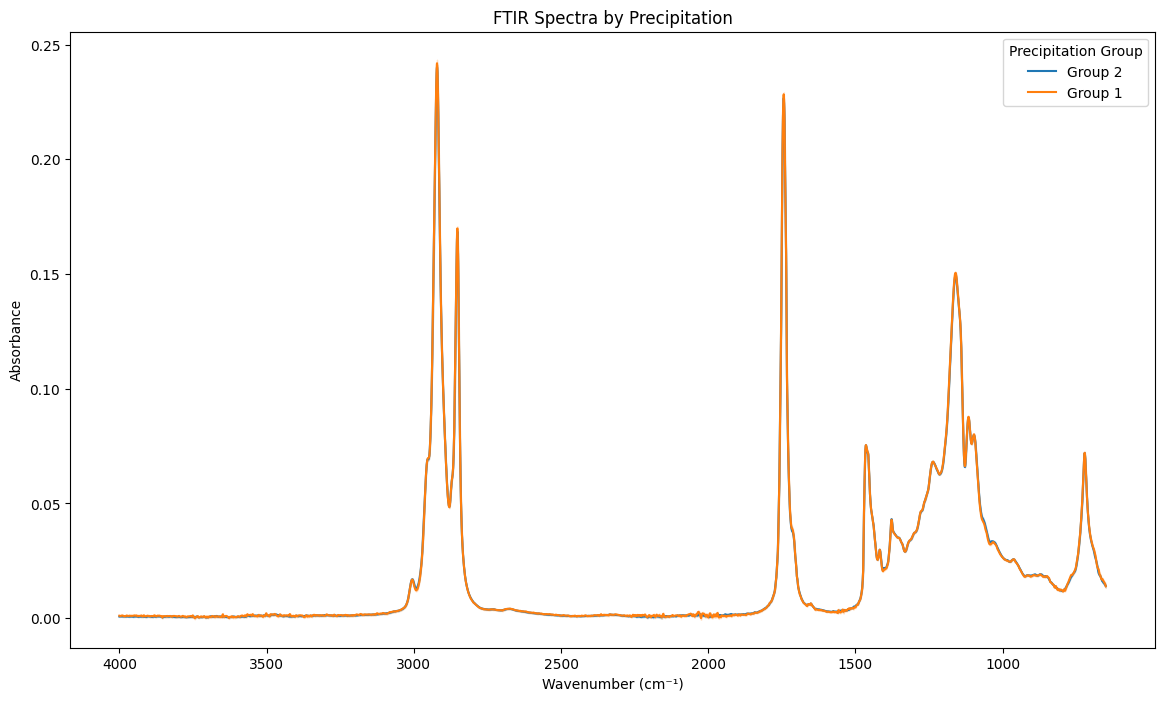

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Data Visualization (Spectroscopy Data by Country Code)
spectroscopy_columns = ftir_data.columns.difference(['country_code', 'prov_char', 'country_char', 'wavenumber', 'country_name', 'tgp_name', 'fgp_name', 'thnoth_name'])
melted_ftir_data = ftir_data.melt(id_vars='dgp_name', value_vars=spectroscopy_columns, var_name='Wavenumber', value_name='Intensity')

# Convert Wavenumber to numeric if it's not already
melted_ftir_data['Wavenumber'] = pd.to_numeric(melted_ftir_data['Wavenumber'])

plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_ftir_data, x='Wavenumber', y='Intensity', hue='dgp_name', palette='tab10')
plt.title('FTIR Spectra by Precipitation')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.legend(title='Precipitation Group')

# Improve x-axis readability by setting ticks every 500 cm⁻¹ and reversing the axis
plt.xticks(np.arange(4000, 649, -500))  # Ticks from 4000 to 650 cm⁻¹
plt.gca().invert_xaxis()  # Reverse the x-axis
plt.grid(False)  # Enable grid

plt.show()

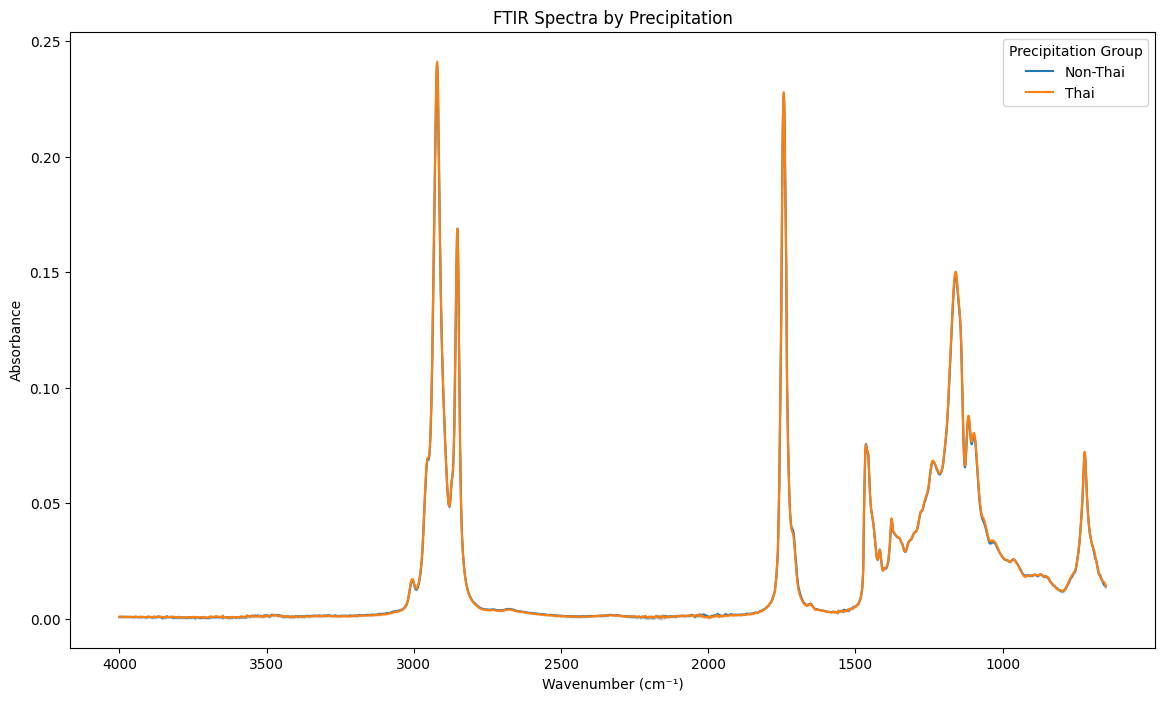

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Data Visualization (Spectroscopy Data by Country Code)
spectroscopy_columns = ftir_data.columns.difference(['country_code', 'prov_char', 'country_char', 'wavenumber', 'country_name', 'tgp_name', 'fgp_name', 'dgp_name'])
melted_ftir_data = ftir_data.melt(id_vars='thnoth_name', value_vars=spectroscopy_columns, var_name='Wavenumber', value_name='Intensity')

# Convert Wavenumber to numeric if it's not already
melted_ftir_data['Wavenumber'] = pd.to_numeric(melted_ftir_data['Wavenumber'])

plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_ftir_data, x='Wavenumber', y='Intensity', hue='thnoth_name', palette='tab10')
plt.title('FTIR Spectra by Precipitation')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.legend(title='Precipitation Group')

# Improve x-axis readability by setting ticks every 500 cm⁻¹ and reversing the axis
plt.xticks(np.arange(4000, 649, -500))  # Ticks from 4000 to 650 cm⁻¹
plt.gca().invert_xaxis()  # Reverse the x-axis
plt.grid(False)  # Enable grid

plt.show()

cekout

In [ ]:
print(ftir_data.head())

  prov_char country_char               wavenumber   649.893   650.376  \
0       BBX           ID  ID-BBX-068-2306-011_001  0.013426  0.014513   
1       BBX           ID  ID-BBX-068-2306-011_002  0.015879  0.016232   
2       BBX           ID  ID-BBX-068-2306-011_003  0.014529  0.014121   
3       BBX           ID  ID-BBX-068-2306-011_004  0.011612  0.010349   
4       BBX           ID  ID-BBX-068-2306-011_005  0.018775  0.018823   

    650.858    651.34   651.822   652.304   652.786  ...  3998.194  3998.676  \
0  0.015536  0.016657  0.018048  0.019807  0.021896  ... -0.000479 -0.000466   
1  0.016136  0.015821  0.015579  0.015664  0.016184  ...  0.000028  0.000005   
2  0.013155  0.011991  0.011024  0.010581  0.010817  ... -0.000955 -0.000920   
3  0.008967  0.007803  0.007213  0.007471  0.008675  ...  0.000526  0.000693   
4  0.018383  0.017739  0.017201  0.016998  0.017179  ...  0.000262  0.000426   

   3999.158   3999.64  4000.122  tgp_name  dgp_name  fgp_name  country_name  \
0